In [1]:
# Remarks
# si η est un certificat avec max eta = 1 et min eta = -1 alors eta + m est aussi un certificat
#

In [1]:
push!(LOAD_PATH,pwd());
using PyPlot, LinearAlgebra, Revise, Statistics, Random
PyPlot.svg(true)

true

In [11]:
function computeIntegral(f::Function, a::Float64, b::Float64, N::Int64=10000)
    return 1/N*sum([f(a+k*(b-a)/N) for k in 0:N-1]);
end

computeIntegral (generic function with 2 methods)

In [2]:
# forward operator ν_M = ν o L^+
function ν_M(a::Array{Float64,1}, x::Array{Float64,1})
    # return forward operator ν_M = ν o L^+ applied to w_{a, x}
    sum([a[k].*f_Lp.*[exp(im*m*x[k]) for m in -fc:fc] for k in 1:length(a)]); # \in \CC^M, M = 2fc + 1
end
function ν_Ms(c::Array{Complex{Float64}, 1})
    # return pre-certificate η = ν_M^*(c), with mean 0, for a given c\in\CC^M
    # η(x::Float64) = real(sum(c.*conj(f_Lp).*[exp(-im*m*x) for m in -fc:fc])); # \in \C_0(\TT)
    function η(x::Float64) # \in \C_0(\TT) 
        p = ν_M([1.0], [x]); # p = ν_M(δ_{x})
        return real(p'*c); # ' takes transpose and conj
    end
    return η;
end
function d1_ν_M(a::Array{Float64,1}, x::Array{Float64,1})
    # return first derivative w.r.t x of forward operator ν_M = ν o L^+ applied to w_{a, x}
    return sum([a[k].*f_Lp.*[im*m*exp(im*m*x[k]) for m in -fc:fc] for k in 1:length(a)]);  # \in \CC^M, M = 2fc + 1
end

d1_ν_M (generic function with 1 method)

In [70]:
function compute_η_V_centered(a::Array{Float64,1}, x::Array{Float64,1})
    # return vanishing derivatives pre-certificate, with mean 0 and centered: interpolates sign(a) at x with η_V'(x_k) = 0
    Γ_x = zeros(Complex{Float64}, 2*fc+1, 2*length(a)); # (ν_M(δ_{x_k}), ∂_{x_k} ν_M(δ_{x_k}))
    for k in 1:length(a)
        Γ_x[:, k] = ν_M([1.0], [x[k]]);
        Γ_x[:, k + length(a)] = d1_ν_M([1.0], [x[k]]);
    end
    
    G = real(Γ_x'*Γ_x); # the " ' " takes transpose() and conj() for complexe coefficients
    b = G\vcat(sign.(a), zeros(length(a)));
    c = Γ_x*b;
    η = ν_Ms(c);
    
    return η, c;
end
function compute_η_V(a::Array{Float64,1}, x::Array{Float64,1})
    # return vanishing derivatives pre-certificate with mean 0: interpolates m + sign(a) at x with η_V'(x_k) = 0
    Γ_x = zeros(Complex{Float64}, 1 + 2*fc+1, 2*length(a)); # (ν_M(δ_{x_k}), ∂_{x_k} ν_M(δ_{x_k}))
    Γ_x[1, :] = -vcat(ones(length(a)), zeros(length(a)));
    for k in 1:length(a)
        Γ_x[2:end, k] = ν_M([1.0], [x[k]]);
        Γ_x[2:end, k + length(a)] = d1_ν_M([1.0], [x[k]]);
    end
    
    G = real(Γ_x'*Γ_x); # the " ' " takes transpose() and conj() for complexe coefficients
    b = G\vcat(sign.(a), zeros(length(a)));
    c = Γ_x*b;
    m = real(c[1]);
    η = ν_Ms(c[2:end]);
    
    return η, c[2:end];
end

compute_η_V (generic function with 1 method)

In [90]:
fc = 20;
N = 1; # order of differential operator L = D^N
f_L = [1.0*im*m for m in -fc:fc]; # Fourier coeff of L
δ = [1.0*(m == 0) for m in -fc:fc];
f_Lp = [(1.0 - δ[m + fc + 1])/(im*m + δ[m + fc + 1])^N for m in -fc:fc]; # Fourier coeff of L^+

In [65]:
a = 1/3*[2., -1., -1.];
x = 2*pi.*[.25, .5, .75];

In [72]:
η_V_c, c_c = compute_η_V_centered(a, x);
η_V, c = compute_η_V(a, x);

In [67]:
tt = collect(LinRange(0, 2*pi, 500));
figure(figsize = (10, 6))
plot(tt, map(η_V_c, tt), lw = 1.0, color = "red", label = L"$\eta_{V,c}$");
plot(tt, map(η_V, tt), lw = 1.0, color = "blue", label = L"$\eta_V$");
for k in 1:length(a)
    plot(x[k]*ones(10), collect(LinRange(0, a[k], 10)), linestyle = "--", lw = 2.0, color = "black");
    plot(x, a, linestyle = "none", Marker = ".", ms = 8.0, color = "black");
end
plot(tt, zeros(length(tt)), lw = .5, color = "black");
plot(tt, ones(length(tt)), linestyle = "--", lw = .5, color = "black");
plot(tt, -ones(length(tt)), linestyle = "--", lw = .5, color = "black");
ax = gca();
ax.set_xlim([0, 2*pi])
legend()
show()

In [68]:
computeIntegral(η_V_c, 0.0, 2*pi)

0.0

In [69]:
computeIntegral(η_V, 0.0, 2*pi)

0.0

In [73]:
c'*c

0.7761138921428123 + 0.0im

In [74]:
c_c'*c_c

0.9537955195800232 + 0.0im

In [19]:
# example 1

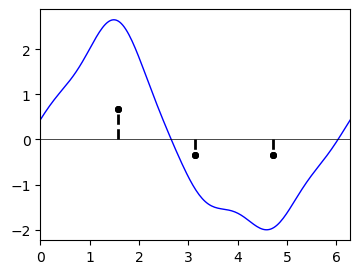

In [75]:
a = 1/3*[2., -1., -1.];
x = 2*pi.*[.25, .5, .75];
y = ν_M(a, x);
η = ν_Ms(y);
###################
tt = collect(LinRange(0, 2*pi, 200));
figure(figsize = (4, 3))
plot(tt, map(η, tt), lw = 1.0, color = "blue", label = L"$\eta$");
for k in 1:length(a)
    plot(x[k]*ones(10), collect(LinRange(0, a[k], 10)), linestyle = "--", lw = 2.0, color = "black");
    plot(x, a, linestyle = "none", Marker = ".", ms = 8.0, color = "black");
end
plot(tt, zeros(length(tt)), lw = .5, color = "black");
ax = gca();
ax.set_xlim([0, 2*pi])
show()

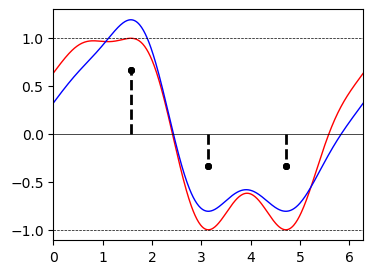

In [77]:
η_V_c, c_c = compute_η_V_centered(a, x);
η_V, c = compute_η_V(a, x);
tt = collect(LinRange(0, 2*pi, 500));
figure(figsize = (4, 3))
plot(tt, map(η_V_c, tt), lw = 1.0, color = "red", label = L"$\eta_{V,c}$");
plot(tt, map(η_V, tt), lw = 1.0, color = "blue", label = L"$\eta_V$");
for k in 1:length(a)
    plot(x[k]*ones(10), collect(LinRange(0, a[k], 10)), linestyle = "--", lw = 2.0, color = "black");
    plot(x, a, linestyle = "none", Marker = ".", ms = 8.0, color = "black");
end
plot(tt, zeros(length(tt)), lw = .5, color = "black");
plot(tt, ones(length(tt)), linestyle = "--", lw = .5, color = "black");
plot(tt, -ones(length(tt)), linestyle = "--", lw = .5, color = "black");
ax = gca();
ax.set_xlim([0, 2*pi])
show()

In [91]:
# example 2

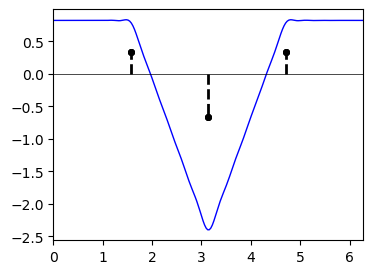

In [92]:
a = [1/3, -2/3, 1/3];
x = 2*pi.*[.25, .5, .75];
y = ν_M(a, x);
η = ν_Ms(y);
###################
tt = collect(LinRange(0, 2*pi, 200));
figure(figsize = (4, 3))
plot(tt, map(η, tt), lw = 1.0, color = "blue", label = L"$\eta$");
for k in 1:length(a)
    plot(x[k]*ones(10), collect(LinRange(0, a[k], 10)), linestyle = "--", lw = 2.0, color = "black");
    plot(x, a, linestyle = "none", Marker = ".", ms = 8.0, color = "black");
end
plot(tt, zeros(length(tt)), lw = .5, color = "black");
ax = gca();
ax.set_xlim([0, 2*pi])
show()

In [93]:
η_V_c, c_c = compute_η_V_centered(a, x);
η_V, c = compute_η_V(a, x);
tt = collect(LinRange(0, 2*pi, 200));
figure(figsize = (4, 3))
# plot(tt, map(η_V_c, tt), lw = 1.0, color = "red", label = L"$\eta_{V,c}$");
plot(tt, map(η_V, tt), lw = 1.0, color = "blue", label = L"$\eta_V$");
for k in 1:length(a)
    plot(x[k]*ones(10), collect(LinRange(0, a[k], 10)), linestyle = "--", lw = 2.0, color = "black");
    plot(x, a, linestyle = "none", Marker = ".", ms = 8.0, color = "black");
end
plot(tt, zeros(length(tt)), lw = .5, color = "black");
plot(tt, ones(length(tt)), linestyle = "--", lw = .5, color = "black");
plot(tt, -ones(length(tt)), linestyle = "--", lw = .5, color = "black");
ax = gca();
ax.set_xlim([0, 2*pi])
legend()
show()

In [81]:
c_c'*c_c

1.672678331090175 + 0.0im

In [82]:
c'*c

1.0960418328738857 + 0.0im

In [12]:
# example 3

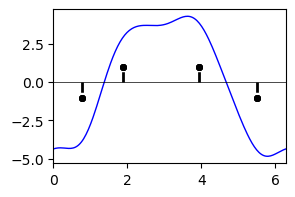

In [32]:
a = [-1, 1., 1., -1.];
x = 2*pi.*[.125, .3, .625, .875];
y = ν_M(a, x);
η = ν_Ms(y);
###################
tt = collect(LinRange(0, 2*pi, 200));
figure(figsize = (3, 2))
plot(tt, map(η, tt), lw = 1.0, color = "blue", label = L"$\eta$");
for k in 1:length(a)
    plot(x[k]*ones(10), collect(LinRange(0, a[k], 10)), linestyle = "--", lw = 2.0, color = "black");
    plot(x, a, linestyle = "none", Marker = ".", ms = 8.0, color = "black");
end
plot(tt, zeros(length(tt)), lw = .5, color = "black");
ax = gca();
ax.set_xlim([0, 2*pi])
show()

In [33]:
η_V_c = compute_η_V_centered(a, x);
η_V = compute_η_V(a, x);
tt = collect(LinRange(0, 2*pi, 200));
figure(figsize = (12, 10))
plot(tt, map(η_V_c, tt), lw = 1.0, color = "red", label = L"$\eta_{V,c}$");
plot(tt, map(η_V, tt), lw = 1.0, color = "blue", label = L"$\eta_V$");
for k in 1:length(a)
    plot(x[k]*ones(10), collect(LinRange(0, a[k], 10)), linestyle = "--", lw = 2.0, color = "black");
    plot(x, a, linestyle = "none", Marker = ".", ms = 8.0, color = "black");
end
plot(tt, zeros(length(tt)), lw = .5, color = "black");
plot(tt, ones(length(tt)), linestyle = "--", lw = .5, color = "black");
plot(tt, -ones(length(tt)), linestyle = "--", lw = .5, color = "black");
ax = gca();
ax.set_xlim([0, 2*pi])
legend()
show()

In [29]:
# example 4

In [34]:
a = [-1, 1., -1., 1.];
x = 2*pi.*[.125, .375, .625, .875];
y = ν_M(a, x);
η = ν_Ms(y);
###################
tt = collect(LinRange(0, 2*pi, 200));
figure(figsize = (4, 3))
plot(tt, map(η, tt), lw = 1.0, color = "blue", label = L"$\eta$");
for k in 1:length(a)
    plot(x[k]*ones(10), collect(LinRange(0, a[k], 10)), linestyle = "--", lw = 2.0, color = "black");
    plot(x, a, linestyle = "none", Marker = ".", ms = 8.0, color = "black");
end
plot(tt, zeros(length(tt)), lw = .5, color = "black");
ax = gca();
ax.set_xlim([0, 2*pi])
show()

In [35]:
η_V_c = compute_η_V_centered(a, x);
η_V = compute_η_V(a, x);
tt = collect(LinRange(0, 2*pi, 200));
figure(figsize = (12, 10))
plot(tt, map(η_V_c, tt), lw = 1.0, color = "red", label = L"$\eta_{V,c}$");
plot(tt, map(η_V, tt), lw = 1.0, color = "blue", label = L"$\eta_V$");
for k in 1:length(a)
    plot(x[k]*ones(10), collect(LinRange(0, a[k], 10)), linestyle = "--", lw = 2.0, color = "black");
    plot(x, a, linestyle = "none", Marker = ".", ms = 8.0, color = "black");
end
plot(tt, zeros(length(tt)), lw = .5, color = "black");
plot(tt, ones(length(tt)), linestyle = "--", lw = .5, color = "black");
plot(tt, -ones(length(tt)), linestyle = "--", lw = .5, color = "black");
ax = gca();
ax.set_xlim([0, 2*pi])
legend()
show()

In [ ]:
# example 5

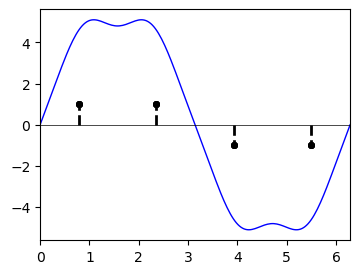

In [36]:
a = [1., 1., -1., -1.];
x = 2*pi.*[.125, .375, .625, .875];
y = ν_M(a, x);
η = ν_Ms(y);
###################
tt = collect(LinRange(0, 2*pi, 200));
figure(figsize = (4, 3))
plot(tt, map(η, tt), lw = 1.0, color = "blue", label = L"$\eta$");
for k in 1:length(a)
    plot(x[k]*ones(10), collect(LinRange(0, a[k], 10)), linestyle = "--", lw = 2.0, color = "black");
    plot(x, a, linestyle = "none", Marker = ".", ms = 8.0, color = "black");
end
plot(tt, zeros(length(tt)), lw = .5, color = "black");
ax = gca();
ax.set_xlim([0, 2*pi])
show()

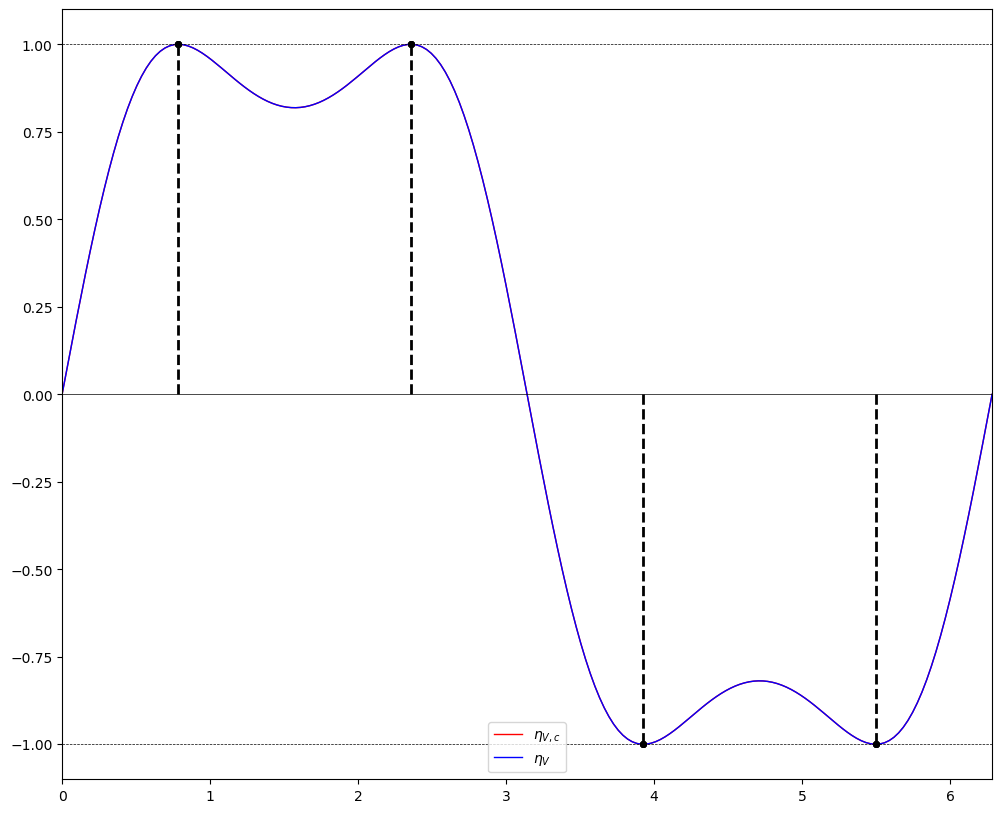

In [37]:
η_V_c = compute_η_V_centered(a, x);
η_V = compute_η_V(a, x);
tt = collect(LinRange(0, 2*pi, 200));
figure(figsize = (12, 10))
plot(tt, map(η_V_c, tt), lw = 1.0, color = "red", label = L"$\eta_{V,c}$");
plot(tt, map(η_V, tt), lw = 1.0, color = "blue", label = L"$\eta_V$");
for k in 1:length(a)
    plot(x[k]*ones(10), collect(LinRange(0, a[k], 10)), linestyle = "--", lw = 2.0, color = "black");
    plot(x, a, linestyle = "none", Marker = ".", ms = 8.0, color = "black");
end
plot(tt, zeros(length(tt)), lw = .5, color = "black");
plot(tt, ones(length(tt)), linestyle = "--", lw = .5, color = "black");
plot(tt, -ones(length(tt)), linestyle = "--", lw = .5, color = "black");
ax = gca();
ax.set_xlim([0, 2*pi])
legend()
show()

In [43]:
# example 6

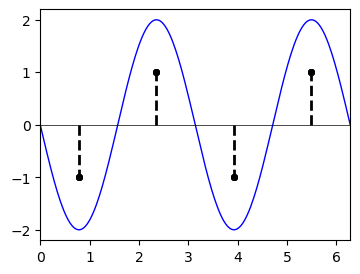

In [38]:
a = [-1, 1., -1., 1.];
x = 2*pi.*[.125, .375, .625, .875];
y = ν_M(a, x);
η = ν_Ms(y);
###################
tt = collect(LinRange(0, 2*pi, 200));
figure(figsize = (4, 3))
plot(tt, map(η, tt), lw = 1.0, color = "blue", label = L"$\eta$");
for k in 1:length(a)
    plot(x[k]*ones(10), collect(LinRange(0, a[k], 10)), linestyle = "--", lw = 2.0, color = "black");
    plot(x, a, linestyle = "none", Marker = ".", ms = 8.0, color = "black");
end
plot(tt, zeros(length(tt)), lw = .5, color = "black");
ax = gca();
ax.set_xlim([0, 2*pi])
show()

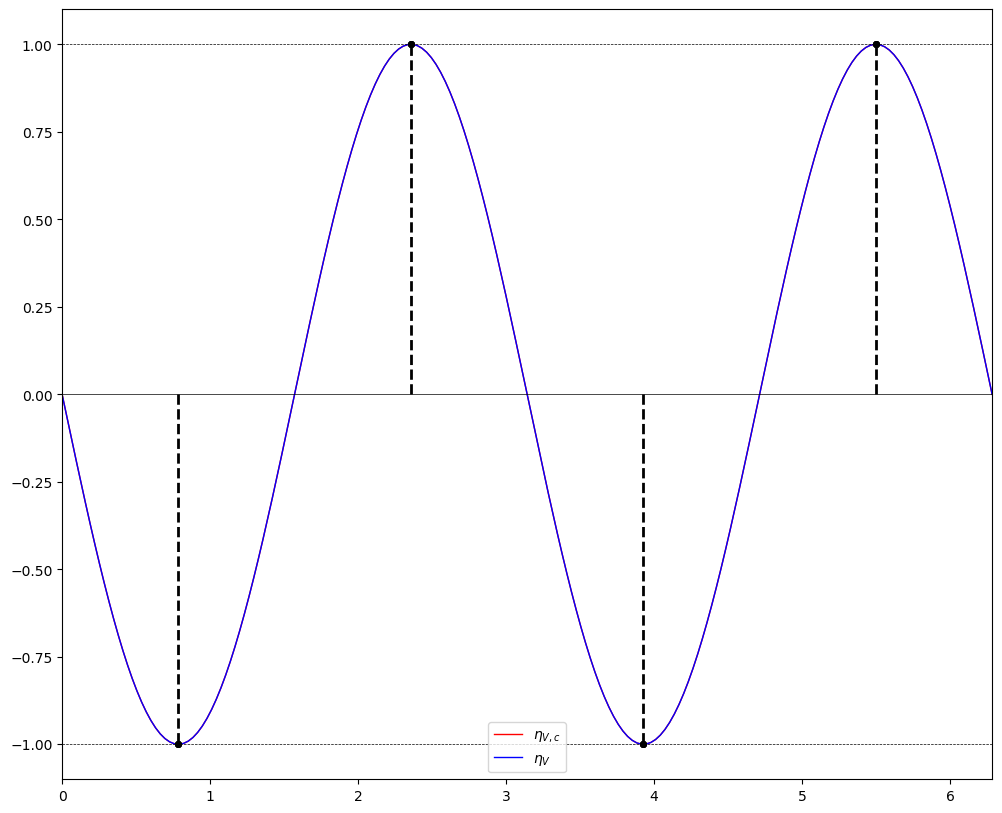

In [39]:
η_V_c = compute_η_V_centered(a, x);
η_V = compute_η_V(a, x);
tt = collect(LinRange(0, 2*pi, 200));
figure(figsize = (12, 10))
plot(tt, map(η_V_c, tt), lw = 1.0, color = "red", label = L"$\eta_{V,c}$");
plot(tt, map(η_V, tt), lw = 1.0, color = "blue", label = L"$\eta_V$");
for k in 1:length(a)
    plot(x[k]*ones(10), collect(LinRange(0, a[k], 10)), linestyle = "--", lw = 2.0, color = "black");
    plot(x, a, linestyle = "none", Marker = ".", ms = 8.0, color = "black");
end
plot(tt, zeros(length(tt)), lw = .5, color = "black");
plot(tt, ones(length(tt)), linestyle = "--", lw = .5, color = "black");
plot(tt, -ones(length(tt)), linestyle = "--", lw = .5, color = "black");
ax = gca();
ax.set_xlim([0, 2*pi])
legend()
show()

In [ ]:
# example 7

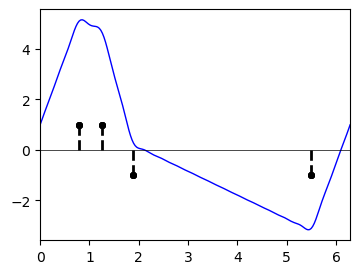

In [62]:
a = [1., 1., -1., -1.];
x = 2*pi.*[.125, .2, .3, .875];
y = ν_M(a, x);
η = ν_Ms(y);
###################
tt = collect(LinRange(0, 2*pi, 200));
figure(figsize = (4, 3))
plot(tt, map(η, tt), lw = 1.0, color = "blue", label = L"$\eta$");
for k in 1:length(a)
    plot(x[k]*ones(10), collect(LinRange(0, a[k], 10)), linestyle = "--", lw = 2.0, color = "black");
    plot(x, a, linestyle = "none", Marker = ".", ms = 8.0, color = "black");
end
plot(tt, zeros(length(tt)), lw = .5, color = "black");
ax = gca();
ax.set_xlim([0, 2*pi])
show()

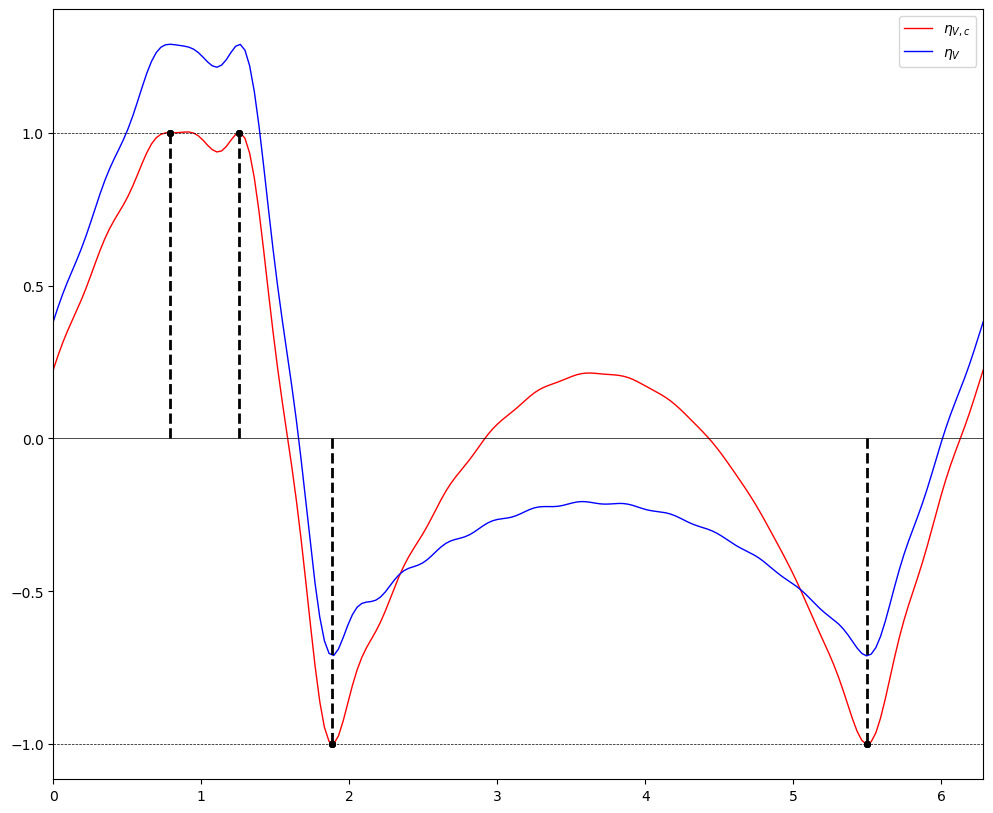

In [63]:
η_V_c = compute_η_V_centered(a, x);
η_V = compute_η_V(a, x);
tt = collect(LinRange(0, 2*pi, 200));
figure(figsize = (12, 10))
plot(tt, map(η_V_c, tt), lw = 1.0, color = "red", label = L"$\eta_{V,c}$");
plot(tt, map(η_V, tt), lw = 1.0, color = "blue", label = L"$\eta_V$");
for k in 1:length(a)
    plot(x[k]*ones(10), collect(LinRange(0, a[k], 10)), linestyle = "--", lw = 2.0, color = "black");
    plot(x, a, linestyle = "none", Marker = ".", ms = 8.0, color = "black");
end
plot(tt, zeros(length(tt)), lw = .5, color = "black");
plot(tt, ones(length(tt)), linestyle = "--", lw = .5, color = "black");
plot(tt, -ones(length(tt)), linestyle = "--", lw = .5, color = "black");
ax = gca();
ax.set_xlim([0, 2*pi])
legend()
show()

In [52]:
m = 1/2*(η_V(2.8) + η_V(4.86))

2.6722784131743005

In [60]:
η_V(x[4]) + m

0.9498304325660258

In [ ]:
# example 7

In [136]:
tt = collect(LinRange(0, 2*pi, 500));
a = [-1, 1., -1., 1.];
figure(figsize = (10, 8))
plot(tt, zeros(length(tt)), lw = .5, color = "black");
plot(tt, ones(length(tt)), linestyle = "--", lw = .5, color = "black");
plot(tt, -ones(length(tt)), linestyle = "--", lw = .5, color = "black");

s = collect(LinRange(0.03, .54, 12));
cmap = PyPlot.cm_get_cmap("viridis", length(s));
for i in 1:length(s)
    x = 2*pi.*[.125 + s[i], .25 + s[i], .625 - s[i], .75 - s[i]];
    η = compute_η_V(a, x);
    plot(tt, map(η, tt), lw = 1.0, color = cmap.colors[i, 1:3], label = L"$\eta$");
    for k in 1:length(a)
        plot(x[k]*ones(10), collect(LinRange(0, a[k], 10)), linestyle = "--", lw = 2.0, color = cmap.colors[i, 1:3]);
        plot(x, a, linestyle = "none", Marker = ".", ms = 8.0, color = cmap.colors[i, 1:3]);
    end
end
ax = gca();
ax.set_xlim([0, 2*pi])
show()